# Machine Intelligence II - Team MensaNord
## Sheet 07

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [131]:
from __future__ import division, print_function
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy.io.wavfile
import scipy.stats
from timeit import default_timer as timer


### 7.1

See the appended pdf.

### 7.2

In [54]:
def ddf_by_df(inp):
    return 1-2.0/(1+np.exp(-inp))

def ICA_natural(X, num_iterations = 18000, eta = 0.01, l = 0.9999, norm = False):
    W = np.random.random((N, N))
    if norm:
        np.fill_diagonal(W, 1)
        
    for t in range(num_iterations):
        x = X[:,t%len(X[0,:])]
        gradient = np.dot(np.eye(N) + np.dot(ddf_by_df(np.dot(W,x)).reshape(N,1),np.dot(W,x).reshape(1,N)),W)
        W += eta*gradient
        if norm:
            Wd = np.diag(W)[np.newaxis, :]
            W /= Wd


        eta = eta * l
    return W

In [55]:
sound1 = np.loadtxt("sound1.dat")
sound2 = np.loadtxt("sound2.dat")
sounds = np.array([sound1, sound2])
N = len(sounds)
A = np.random.random((N, N))
xsounds = np.dot(A, sounds)
neworder = np.random.permutation(np.arange(18000)) 
pxsounds = xsounds[:, np.asarray(neworder)]
cpxsounds = pxsounds - np.mean(pxsounds,axis = 1)[:,np.newaxis]

#### a) with ICA+natural gradient descent

In [134]:
for i in range(10):
    t0 = timer()
    W = ICA_natural(cpxsounds, num_iterations=1*len(cpxsounds[0]),eta=0.01, l=0.9999, norm=False)
    t = timer()
    dt.append((t-t0))
print("time: %f s" %np.mean(dt))
unmixed = np.dot(W,xsounds)


time: 0.371484 s


In [124]:
unmixed_ICA = unmixed[np.argmax(np.dot(W,A), axis=1)]

In [125]:
sounds.shape, unmixed_ICA.shape

((2, 18000), (2, 2))

In [111]:
unmixed_ICA = MinMaxScaler(unmixed_ICA)
sounds_scaled = MinMaxScaler(sounds)


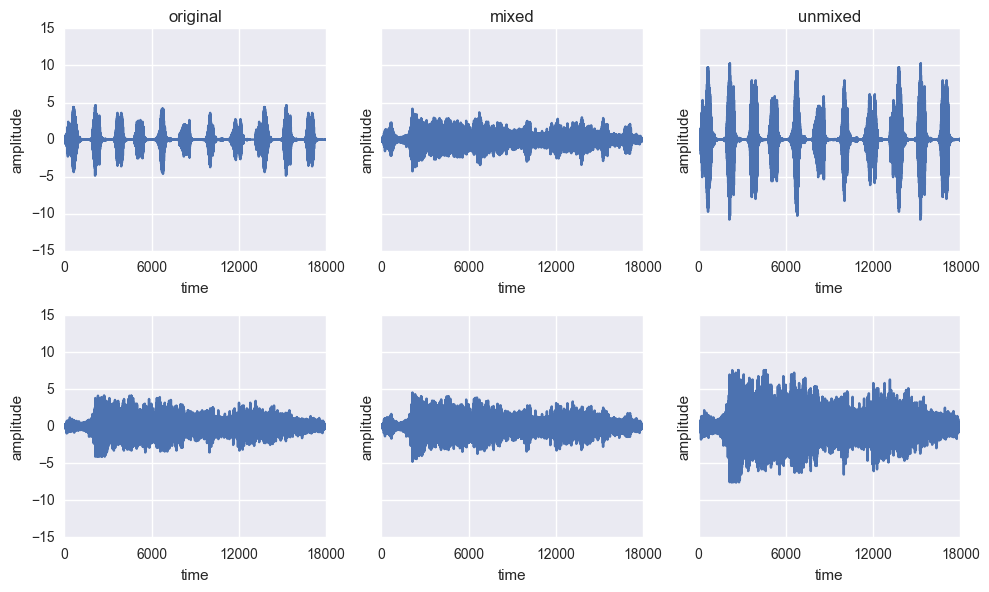

In [63]:
fig, axs = plt.subplots(2,3, sharex=False, sharey=True, figsize = (10,6))
for i in range(2):
    axs[i, 0].plot(np.linspace(0, 18000, 18000), sounds[i])
    axs[i, 1].plot(xsounds[i])
    axs[i, 2].plot(unmixed[np.argmax(np.dot(W,A)[:,i])])

axs[0, 0].set_title('original')
axs[0, 1].set_title('mixed')
axs[0, 2].set_title('unmixed')
plt.setp(axs, xlabel = 'time', ylabel = 'amplitude', xticks=np.arange(0, 18000+1, 6000))
fig.tight_layout()
plt.show()

#### b) FastICA

In [97]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [135]:
fICA = FastICA(max_iter = len(cpxsounds[0]))
dt=[]
for i in range(10):
    t0 = timer()
    unmixed = fICA.fit_transform(cpxsounds.T)
    t= timer()
    dt.append((t-t0))
print("time: %f s" %np.mean(dt))
W = fICA.components_

time: 0.005124 s


### 7.3 

In [136]:
!ls

07_Zaki_Atanaszov_evaluated.ipynb sheet07_fastica.pdf
imgpca                            sound1.dat
sheet07.ipynb                     sound2.dat


In [137]:
!ls imgpca/

b1.jpg    b7.jpg    d1.jpg    d5.jpg    n11.jpg   n6.jpg    t12.jpg   t6.jpg
b10.jpg   b8.jpg    d10.jpg   d6.jpg    n12.jpg   n7.jpg    t13.jpg   t7.jpg
b2.jpg    b9.jpg    d11.jpg   d7.jpg    n13.jpg   n8.jpg    t14.jpg   t8.jpg
b3.jpg    b9_16.jpg d12.jpg   d8.jpg    n2.jpg    n9.jpg    t2.jpg    t9.jpg
b4.jpg    b9_2.jpg  d2.jpg    d9.jpg    n3.jpg    t1.jpg    t3.jpg
b5.jpg    b9_4.jpg  d3.jpg    n1.jpg    n4.jpg    t10.jpg   t4.jpg
b6.jpg    b9_8.jpg  d4.jpg    n10.jpg   n5.jpg    t11.jpg   t5.jpg


In [154]:
from sklearn.feature_extraction.image import extract_patches_2d
import os
from scipy.ndimage import imread


In [156]:
n, b, t = [], [], []
for filename in os.listdir('./imgpca/'):
    filepath = os.getcwd()+'/imgpca/'+filename
    if filename.startswith('b'):
        b.append(filepath)
    elif filename.startswith('n'):
        n.append(filepath)
    elif filename.startswith('t'):
        t.append(filepath)

In [166]:
P = 20000
N = 144

In [168]:
for c in [n,b,t]:
    for img_path in c:
        img = imread(img_path)
        pS = int(np.sqrt(N))
        patches = extract_patches_2d(img, 
                           patch_size = (pS, pS), max_patches=0.2)

(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(24549, 12, 12)
(33447, 12, 12)
(31589, 12, 12)
(42249, 12, 12)
(31491, 12, 12)
(31491, 12, 12)
(36283, 12, 12)
(38044, 12, 12)
(31589, 12, 12)
(31491, 12, 12)
(33643, 12, 12)
(44, 12, 12)
(7934, 12, 12)
(1755, 12, 12)
(336, 12, 12)
(43807, 12, 12)
(109858, 12, 12)
(72855, 12, 12)
(44784, 12, 12)
(111374, 12, 12)
(132232, 12, 12)
(88776, 12, 12)
(30436, 12, 12)
(49245, 12, 12)
(36700, 12, 12)
(31752, 12, 12)
(47360, 12, 12)
(46287, 12, 12)
(90688, 12, 12)
